In [2]:
!kaggle competitions list

ref                                                                               deadline             category            reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/llm-detect-ai-generated-text                  2024-01-22 23:59:00  Featured          $110,000       1872           False  
https://www.kaggle.com/competitions/open-problems-single-cell-perturbations       2023-11-30 23:59:00  Featured          $100,000       1153           False  
https://www.kaggle.com/competitions/stanford-ribonanza-rna-folding                2023-12-07 23:59:00  Research          $100,000        702           False  
https://www.kaggle.com/competitions/optiver-trading-at-the-close                  2023-12-20 23:59:00  Featured          $100,000       3655           False  
https://www.kaggle.com/competitions/nfl-big-da

In [3]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv('data-files/train.csv')
test = pd.read_csv('data-files/test.csv')
print('train.shape : ', train.shape)
print('test.shape : ', test.shape)

train.shape :  (1460, 81)
test.shape :  (1459, 80)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
train.drop(train[(train.OverallQual<4) & (train.SalePrice > 200000)].index, inplace=True)
train.drop(train[(train.OverallCond<4) & (train.SalePrice > 200000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)
train.shape

(1458, 81)

The value of mu before log transformation is: 180761.24142661178
The value of sigma before log transformation is: 79270.93617295024


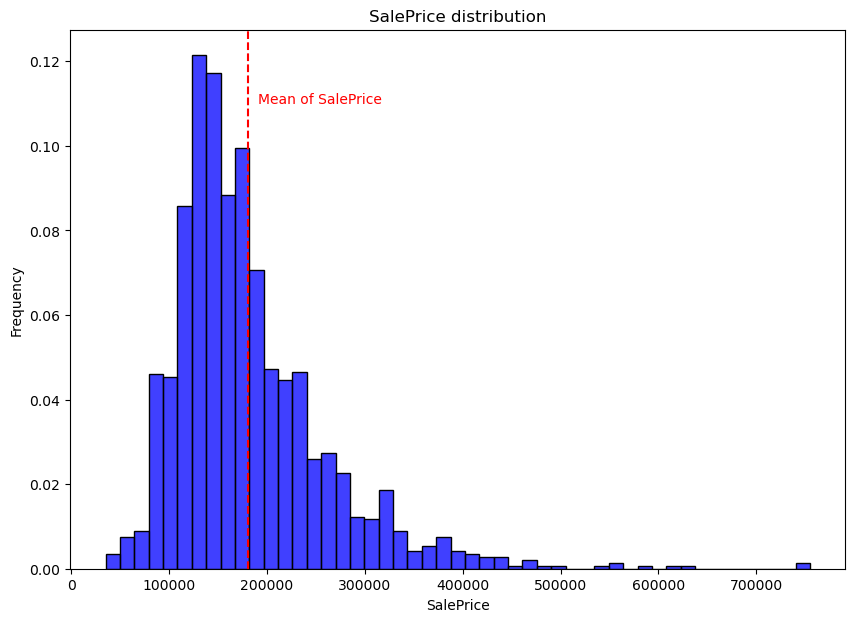

In [10]:
from scipy.stats import norm

(mu, sigma) = norm.fit(train.SalePrice)
print(f'The value of mu before log transformation is: {mu}')
print(f'The value of sigma before log transformation is: {sigma}')

fig, ax = plt.subplots(figsize = (10, 7))
sns.histplot(train['SalePrice'], color='b', stat='probability')
ax.xaxis.grid(False)
ax.set(ylabel='Frequency')
ax.set(xlabel='SalePrice')
ax.set(title='SalePrice distribution')

plt.axvline(mu, color='r', linestyle='--')
plt.text(mu+10000, 0.11, 'Mean of SalePrice', rotation=0, color='r')
plt.show()

The value of mu after log transformation is: 12.0233397799989
The value of sigma after log transformation is: 0.3989191793099824


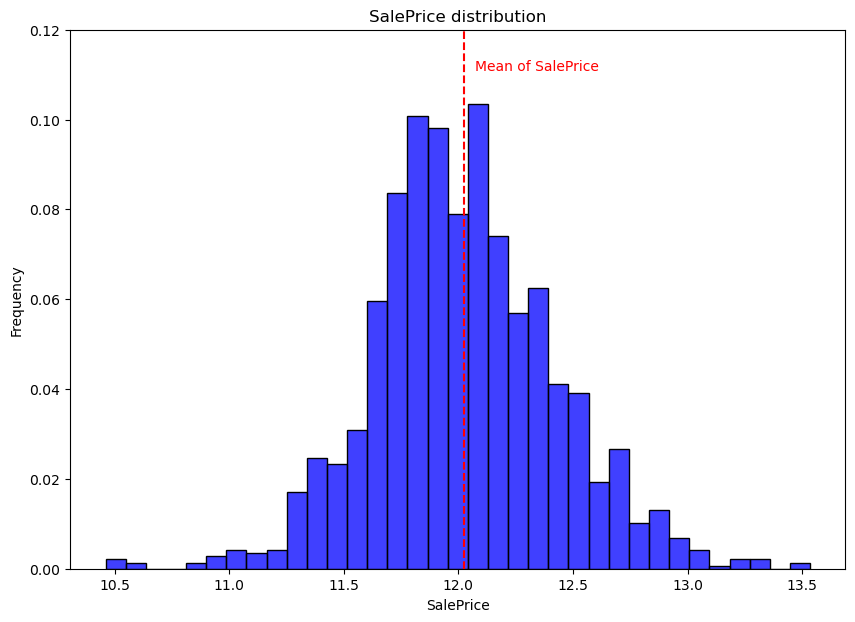

In [11]:
#로그 변환을 통한 정규화

train['SalePrice'] = np.log1p(train['SalePrice'])

(mu, sigma) = norm.fit(train.SalePrice)
print(f'The value of mu after log transformation is: {mu}')
print(f'The value of sigma after log transformation is: {sigma}')

fig, ax = plt.subplots(figsize = (10, 7))
sns.histplot(train['SalePrice'], color='b', stat='probability')
ax.xaxis.grid(False)
ax.set(ylabel='Frequency')
ax.set(xlabel='SalePrice')
ax.set(title='SalePrice distribution')

plt.axvline(mu, color='r', linestyle='--')
plt.text(mu+0.05, 0.111, 'Mean of SalePrice', rotation=0, color='r')
plt.ylim(0, 0.12)
plt.show()

In [12]:
train_id = train['Id']
test_id = test['Id']

train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.shape, test.shape

((1458, 80), (1459, 79))

In [13]:
y = train['SalePrice'].reset_index(drop=True)
train = train.drop(['SalePrice'], axis=1)
train.shape, test.shape, y.shape

((1458, 79), (1459, 79), (1458,))

In [14]:
all_df = pd.concat([train, test]).reset_index(drop=True)
all_df.shape

(2917, 79)

In [15]:
#결측치 처리
def check_na(data, head_num=6):
	isnull_na = (data.isnull().sum() / len(data)) * 100
	data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending = False)
	missing_data = pd.DataFrame({'Missing Ratio' : data_na,
								'Data Type' : data.dtypes[data_na.index]})
	print('결측치 데이터 컬럼과 건수:\n', missing_data.head(head_num))
check_na(all_df, 20)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
PoolQC            99.657182    object
MiscFeature       96.400411    object
Alley             93.212204    object
Fence             80.425094    object
FireplaceQu       48.680151    object
LotFrontage       16.626671   float64
GarageFinish       5.450806    object
GarageQual         5.450806    object
GarageCond         5.450806    object
GarageYrBlt        5.450806   float64
GarageType         5.382242    object
BsmtExposure       2.811107    object
BsmtCond           2.811107    object
BsmtQual           2.776826    object
BsmtFinType2       2.742544    object
BsmtFinType1       2.708262    object
MasVnrType         0.788481    object
MasVnrArea         0.754200   float64
MSZoning           0.137127    object
BsmtFullBath       0.068564   float64


In [16]:
all_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace=True)
check_na(all_df, 20)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageCond         5.450806    object
GarageQual         5.450806    object
GarageYrBlt        5.450806   float64
GarageFinish       5.450806    object
GarageType         5.382242    object
BsmtCond           2.811107    object
BsmtExposure       2.811107    object
BsmtQual           2.776826    object
BsmtFinType2       2.742544    object
BsmtFinType1       2.708262    object
MasVnrType         0.788481    object
MasVnrArea         0.754200   float64
MSZoning           0.137127    object
Functional         0.068564    object
Utilities          0.068564    object
BsmtFullBath       0.068564   float64
BsmtHalfBath       0.068564   float64
GarageArea         0.034282   float64
GarageCars         0.034282   float64
TotalBsmtSF        0.034282   float64


In [17]:
#결측치 처리 - 문자열 데이터

cat_all_vars = train.select_dtypes(exclude=[np.number])
print("The whole number of cat_all_vars:", len(list(cat_all_vars)))

final_cat_vars = []
for v in cat_all_vars:
	if v not in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']:
		final_cat_vars.append(v)
print("The whole number of final_cat_vars", len(final_cat_vars))

for i in final_cat_vars:
	all_df[i] = all_df[i].fillna(all_df[i].mode()[0])

check_na(all_df, 20)

The whole number of cat_all_vars: 43
The whole number of final_cat_vars 38
결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageYrBlt        5.450806   float64
MasVnrArea         0.754200   float64
BsmtFullBath       0.068564   float64
BsmtHalfBath       0.068564   float64
BsmtFinSF1         0.034282   float64
BsmtFinSF2         0.034282   float64
BsmtUnfSF          0.034282   float64
TotalBsmtSF        0.034282   float64
GarageCars         0.034282   float64
GarageArea         0.034282   float64


In [18]:
#결측치 처리 - 수치형 데이터

num_all_vars = list(train.select_dtypes(include=[np.number]))
print("The whole number of num_all_vars:", len(list(num_all_vars)))
num_all_vars.remove('LotFrontage')

print("The whole number of final_cat_vars", len(num_all_vars))
for i in num_all_vars:
	all_df[i] = all_df[i].fillna(all_df[i].median())

check_na(all_df, 20)

The whole number of num_all_vars: 36
The whole number of final_cat_vars 35
결측치 데이터 컬럼과 건수:
 Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []


In [19]:
# 왜도 값 처리
from scipy.stats import skew

def find_skew(x):
	return skew(x)
skew_features = all_df[num_all_vars].apply(find_skew).sort_values(ascending=False)
skew_features

MiscVal          21.939672
PoolArea         16.892477
LotArea          12.867139
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.318923
BsmtFinSF2        4.144503
EnclosedPorch     4.013741
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.615714
OpenPorchSF       2.534326
WoodDeckSF        1.841876
1stFlrSF          1.469798
BsmtFinSF1        1.429239
MSSubClass        1.374726
GrLivArea         1.271773
TotalBsmtSF       1.165468
BsmtUnfSF         0.919795
2ndFlrSF          0.860643
TotRmsAbvGrd      0.760404
Fireplaces        0.734449
HalfBath          0.695072
BsmtFullBath      0.626733
OverallCond       0.584601
BedroomAbvGr      0.329555
GarageArea        0.241611
OverallQual       0.196514
MoSold            0.195229
FullBath          0.164226
YrSold            0.132129
GarageCars       -0.218309
GarageYrBlt      -0.398311
YearRemodAdd     -0.451063
YearBuilt        -0.600023
dtype: float64

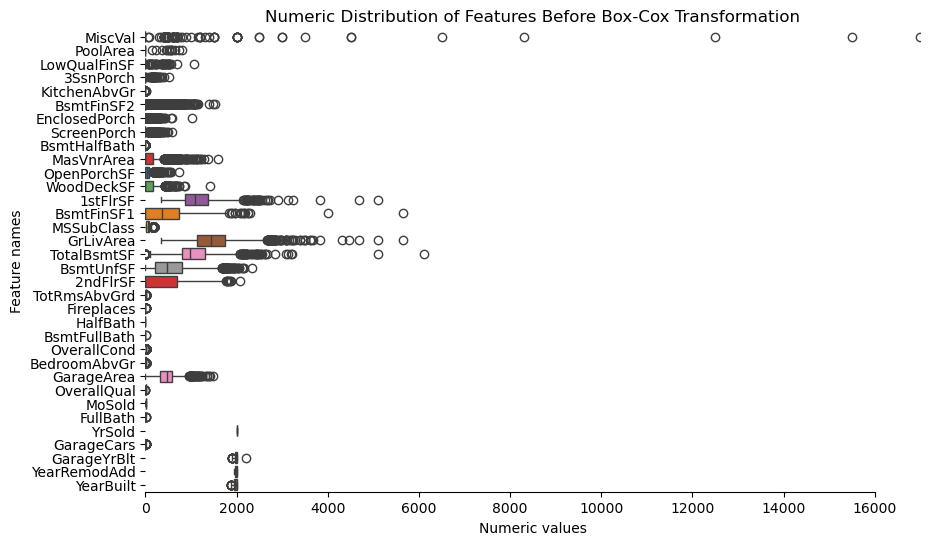

In [20]:
skewnewss_index = list(skew_features.index)
skewnewss_index.remove('LotArea')
all_numeric_df = all_df.loc[:, skewnewss_index]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, all_numeric_df.max().sort_values(ascending=False)[0])
ax = sns.boxplot(data=all_numeric_df, orient='h', palette='Set1')
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features Before Box-Cox Transformation")
sns.despine(trim=True, left=True)

In [21]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
'''
가격에 log1p 변환해서 boxcox1p
boxcox_normmax는 람다 최적값 찾는 함수
'''
high_skew = skew_features[skew_features > 1]
print("The data before Box-Cox Transformation: \n", all_df[high_skew.index].head())

for num_var in high_skew.index:
	all_df[num_var] = boxcox1p(all_df[num_var], boxcox_normmax(all_df[num_var] + 1))

print("The data after Box-Cox Transformation: \n", all_df[high_skew.index].head())

The data before Box-Cox Transformation: 
    MiscVal  PoolArea  LotArea  LowQualFinSF  3SsnPorch  KitchenAbvGr  \
0        0         0     8450             0          0             1   
1        0         0     9600             0          0             1   
2        0         0    11250             0          0             1   
3        0         0     9550             0          0             1   
4        0         0    14260             0          0             1   

   BsmtFinSF2  EnclosedPorch  ScreenPorch  BsmtHalfBath  MasVnrArea  \
0         0.0              0            0           0.0       196.0   
1         0.0              0            0           1.0         0.0   
2         0.0              0            0           0.0       162.0   
3         0.0            272            0           0.0         0.0   
4         0.0              0            0           0.0       350.0   

   OpenPorchSF  WoodDeckSF  1stFlrSF  BsmtFinSF1  MSSubClass  GrLivArea  \
0           61         

c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\scipy\stats\_stats_py.py:4464: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(stats.NearConstantInputWarning(msg))


In [22]:
#도출 변수 생성
#주택의 크기
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']
all_df = all_df.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis=1)

print(all_df.shape)

(2917, 71)


In [23]:
#화장실
all_df['Total_Bathroom'] = (all_df['FullBath'] + (0.5*all_df['HalfBath']) + all_df['BsmtFullBath'] + (0.5*all_df['BsmtHalfBath']))
#베란다?느낌
all_df['Total_porch_sf'] = (all_df['OpenPorchSF'] + all_df['3SsnPorch'] + all_df['EnclosedPorch'] + all_df['ScreenPorch'])
all_df = all_df.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'], axis=1)

all_df.shape

(2917, 65)

In [24]:
#연도 관련 변수 찾기
num_all_vars = list(train.select_dtypes(include=[np.number]))
year_feature = []
for var in num_all_vars:
	if 'Yr' in var:
		year_feature.append(var)
	elif 'Year' in var:
		year_feature.append(var)
	else:
		print(var, 'is not related with Year')
print(year_feature)

MSSubClass is not related with Year
LotFrontage is not related with Year
LotArea is not related with Year
OverallQual is not related with Year
OverallCond is not related with Year
MasVnrArea is not related with Year
BsmtFinSF1 is not related with Year
BsmtFinSF2 is not related with Year
BsmtUnfSF is not related with Year
TotalBsmtSF is not related with Year
1stFlrSF is not related with Year
2ndFlrSF is not related with Year
LowQualFinSF is not related with Year
GrLivArea is not related with Year
BsmtFullBath is not related with Year
BsmtHalfBath is not related with Year
FullBath is not related with Year
HalfBath is not related with Year
BedroomAbvGr is not related with Year
KitchenAbvGr is not related with Year
TotRmsAbvGrd is not related with Year
Fireplaces is not related with Year
GarageCars is not related with Year
GarageArea is not related with Year
WoodDeckSF is not related with Year
OpenPorchSF is not related with Year
EnclosedPorch is not related with Year
3SsnPorch is not rela

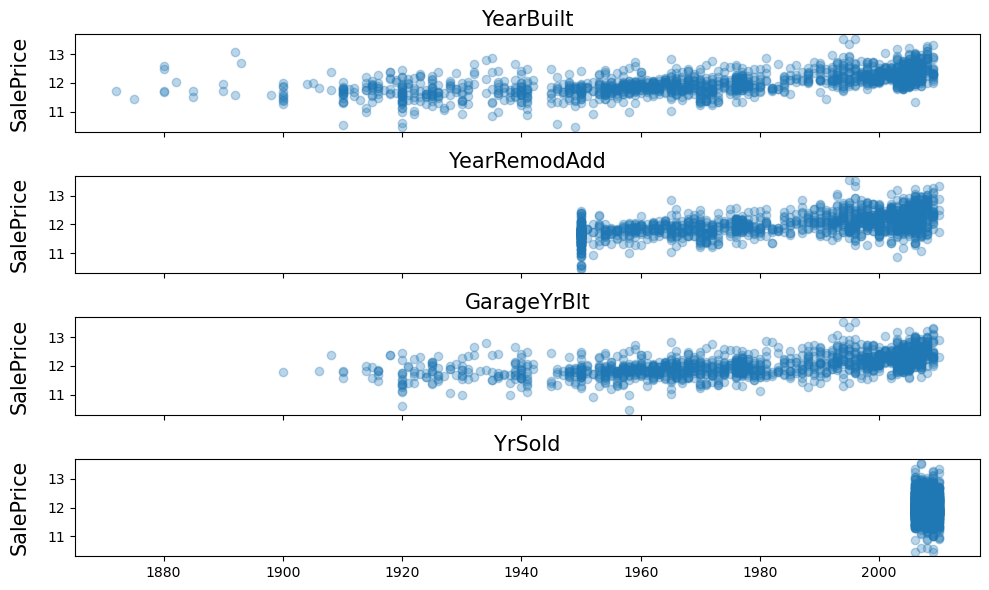

In [25]:
fig, ax = plt.subplots(4, 1, figsize=(10, 6), sharex=True, sharey=True)
for i, var in enumerate(year_feature):
	ax[i].scatter(train[var], y, alpha=0.3)
	ax[i].set_title(f'{var}', size=15)
	ax[i].set_ylabel('SalePrice', size=15, labelpad=12.5)

plt.tight_layout()
plt.show()

In [26]:
all_df = all_df.drop(['YearBuilt', 'GarageYrBlt'], axis=1)
all_df.shape

(2917, 63)

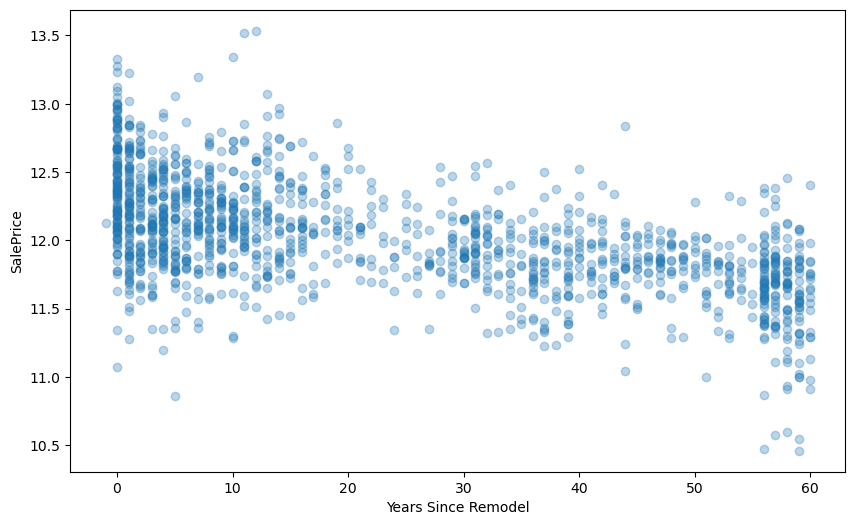

In [27]:
YearsSinceRemodel = train['YrSold'].astype(int) - train['YearRemodAdd'].astype(int)

plt.figure(figsize=(10, 6))
plt.scatter(YearsSinceRemodel, y, alpha=0.3)
plt.xlabel('Years Since Remodel')
plt.ylabel('SalePrice')
plt.show()

In [28]:
all_df['YearsSinceRemodel'] = all_df['YrSold'].astype(int) - all_df['YearRemodAdd'].astype(int)
all_df = all_df.drop(['YrSold', 'YearRemodAdd'], axis=1)
all_df.shape

(2917, 62)

In [29]:
#수영장 크기
all_df['PoolArea'].value_counts()

0.000000    2904
5.843016       1
6.048366       1
5.945809       1
5.913421       1
5.786591       1
5.854879       1
6.161330       1
4.721829       1
5.553561       1
5.718338       1
5.130821       1
5.922801       1
6.231252       1
Name: PoolArea, dtype: int64

In [30]:
#Data binding

def count_dummy(x):
	if x > 0:
		return 1
	else:
		return 0

all_df['PoolArea'] = all_df['PoolArea'].apply(count_dummy)
all_df['PoolArea'].value_counts()

0    2904
1      13
Name: PoolArea, dtype: int64

In [31]:
all_df['GarageArea'] = all_df['GarageArea'].apply(count_dummy)
all_df['GarageArea'].value_counts()

1    2760
0     157
Name: GarageArea, dtype: int64

In [32]:
all_df['Fireplaces'] = all_df['Fireplaces'].apply(count_dummy)
all_df['Fireplaces'].value_counts()

1    1497
0    1420
Name: Fireplaces, dtype: int64

In [33]:
#ohe

all_df = pd.get_dummies(all_df).reset_index(drop=True)
all_df.shape

(2917, 258)

In [34]:
# 학습

X = all_df.iloc[:len(y), :]
X_test = all_df.iloc[len(y):, :]
X.shape, y.shape, X_test.shape

((1458, 258), (1458,), (1459, 258))

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1093, 258), (365, 258), (1093,), (365,))

In [36]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def cv_rmse(model, n_folds=5):
	cv = KFold(n_splits=5, random_state=42, shuffle=True)
	rmse_list = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv))
	print('CV RMSE value list:', np.round(rmse_list, 4))
	print('CV RMSE mean value:', np.round(np.mean(rmse_list), 4))
	return (rmse_list)

n_folds = 5
rmse_scores = {}
lr = LinearRegression()

score = cv_rmse(lr, n_folds)
print('linear regression-mean: {:.4f}(std: {:.4f})'.format(score.mean(), score.std()))
rmse_scores['linear regression'] = (score.mean(), score.std())

CV RMSE value list: [0.139  0.1749 0.1489 0.1102 0.1064]
CV RMSE mean value: 0.1359
linear regression-mean: 0.1359(std: 0.0254)


In [37]:
from sklearn.model_selection import cross_val_predict

X = all_df.iloc[:len(y), :]
X_test = all_df.iloc[len(y):, :]
X.shape, y.shape, X_test.shape

model = lr.fit(X, y)
final_preds = np.floor(np.expm1(model.predict(X_test)))
print(final_preds)

[117164. 158072. 187662. ... 173438. 115451. 219376.]


In [70]:
submission = pd.read_csv('data-files/sample_submission.csv')
submission.iloc[:, 1] = final_preds
print(submission.head())
# submission.to_csv('regression.csv', index=False)

     Id  SalePrice
0  1461   117164.0
1  1462   158072.0
2  1463   187662.0
3  1464   197265.0
4  1465   199692.0


In [40]:
# 알고리즘 추가
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
gbr_model = GradientBoostingRegressor()

score = cv_rmse(tree_model, n_folds)
print('Decision Tree Regressor-mean: {:.4f} (std: {:.4f})'.format(score.mean(), score.std()))
rmse_scores['Decision Tree Regressor'] = (score.mean(), score.std())

score = cv_rmse(rf_model, n_folds)
print('Random Forest Regressor-mean: {:.4f} (std: {:.4f})'.format(score.mean(), score.std()))
rmse_scores['Random Forest Regressor'] = (score.mean(), score.std())

score = cv_rmse(gbr_model, n_folds)
print('Gradient Boosting Regressor-mean: {:.4f} (std: {:.4f})'.format(score.mean(), score.std()))
rmse_scores['Gradient Boosting Regressor'] = (score.mean(), score.std())

CV RMSE value list: [0.1977 0.2108 0.2244 0.1748 0.1685]
CV RMSE mean value: 0.1952
Decision Tree Regressor-mean: 0.1952 (std: 0.0211)
CV RMSE value list: [0.1491 0.154  0.1463 0.1401 0.1281]
CV RMSE mean value: 0.1435
Random Forest Regressor-mean: 0.1435 (std: 0.0089)
CV RMSE value list: [0.1355 0.1378 0.1319 0.1208 0.1218]
CV RMSE mean value: 0.1296
Gradient Boosting Regressor-mean: 0.1296 (std: 0.0070)


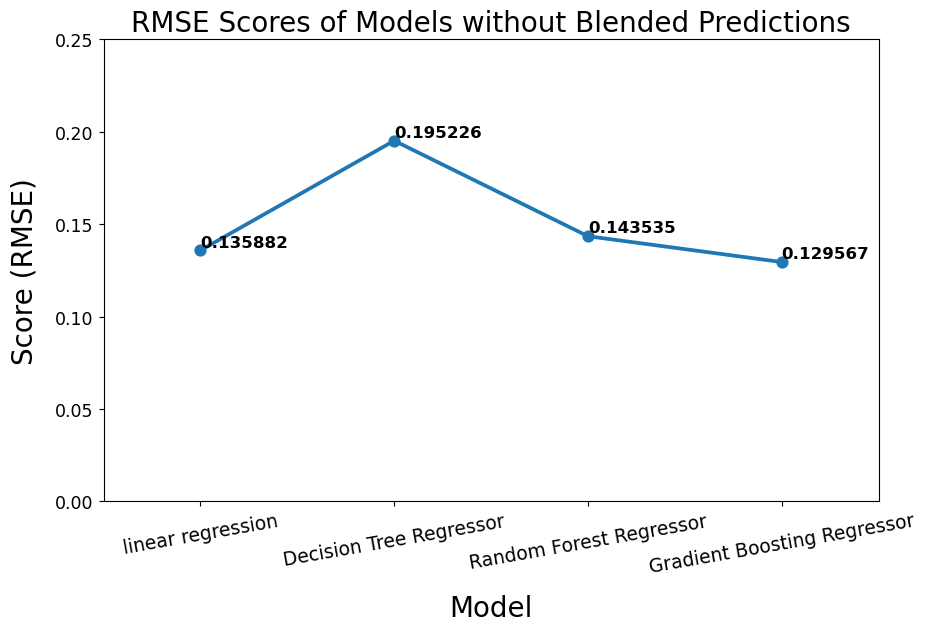

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.pointplot(x=list(rmse_scores.keys())
				   , y=[score for score, _ in rmse_scores.values()]
				   , markers='o'
				   , linestyle='-'
				   , ax=ax)
for i, score in enumerate(rmse_scores.values()):
	ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left'
		 , size='large', color='black', weight='semibold')

ax.set_ylabel('Score (RMSE)', size=20, labelpad=12.5)
ax.set_xlabel('Model', size=20, labelpad=12.5)
ax.tick_params(axis='x', labelsize=13.5, rotation=10)
ax.tick_params(axis='y', labelsize=12.5)
ax.set_ylim(0, 0.25)
ax.set_title('RMSE Scores of Models without Blended Predictions', size=20)

plt.show()

In [65]:
lr_model_fit = lr_model.fit(X, y)
tree_model_fit = tree_model.fit(X, y)
rf_model_fit = rf_model.fit(X, y)
gbr_model_fit = gbr_model.fit(X, y)

def blended_learning_predictions(X):
	blended_score = (0.3 * lr_model_fit.predict(X)) +\
		(0.1 * tree_model_fit.predict(X)) +\
		(0.3 * rf_model_fit.predict(X)) +\
		(0.3 * gbr_model_fit.predict(X))
	return blended_score

def rmsle(y_true, y_pred):
	return np.sqrt(mean_squared_error(y_true, y_pred))

In [66]:
blended_score=rmsle(y, blended_learning_predictions(X))
rmse_scores['blended'] = (blended_score, 0)
print('RMSE score on train data :')
print(blended_score)

RMSE score on train data :
0.06286645408993166


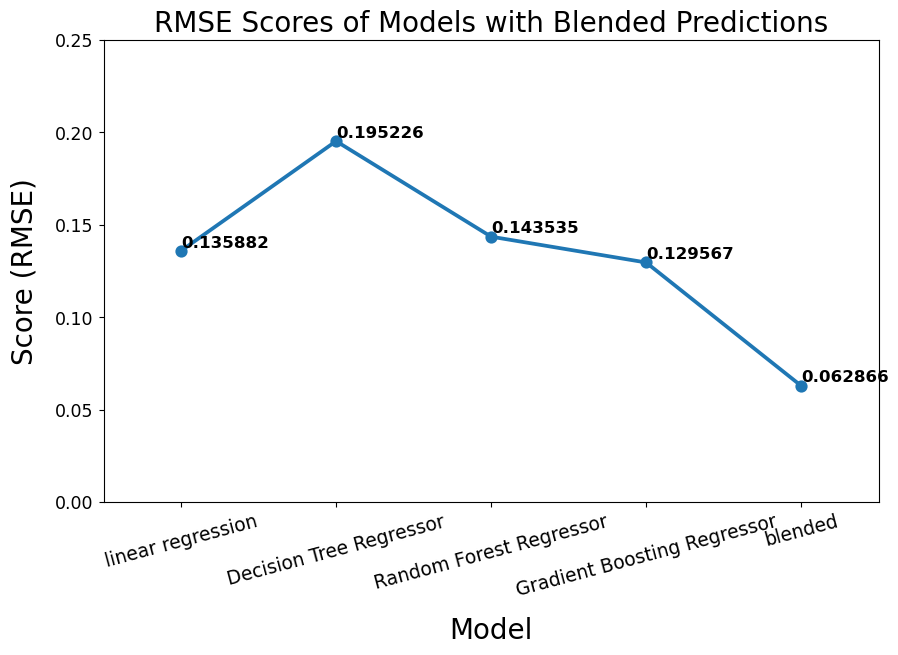

In [68]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.pointplot(x=list(rmse_scores.keys())
				   , y=[score for score, _ in rmse_scores.values()]
				   , markers='o'
				   , linestyle='-'
				   , ax=ax)
for i, score in enumerate(rmse_scores.values()):
	ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left'
		 , size='large', color='black', weight='semibold')

ax.set_ylabel('Score (RMSE)', size=20, labelpad=12.5)
ax.set_xlabel('Model', size=20, labelpad=12.5)
ax.tick_params(axis='x', labelsize=13.5, rotation=15)
ax.tick_params(axis='y', labelsize=12.5)
ax.set_ylim(0, 0.25)
ax.set_title('RMSE Scores of Models with Blended Predictions', size=20)

plt.show()

In [74]:
submission.iloc[:, 1] = np.floor(np.expm1(blended_learning_predictions(X_test)))
submission.to_csv('second_blending.csv', index=False)